In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from wordcloud import WordCloud

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lilia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
df = pd.read_csv("customer_support_tickets.csv")
df.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [8]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

Ticket ID                          0
Customer Name                      0
Customer Email                     0
Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Date of Purchase                   0
Ticket Type                        0
Ticket Subject                     0
Ticket Description                 0
Ticket Status                      0
Resolution                      5700
Ticket Priority                    0
Ticket Channel                     0
First Response Time             2819
Time to Resolution              5700
Customer Satisfaction Rating    5700
dtype: int64

In [9]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)  # remove non-letters
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

df['cleaned_text'] = df['Ticket Description'].apply(clean_text)
df[['Ticket Description', 'cleaned_text']].head()

,Ticket Description,cleaned_text
0,I'm having an issue with the {product_purchase...,im issue productpurchased please assist billin...
1,I'm having an issue with the {product_purchase...,im issue productpurchased please assist need c...
2,I'm facing a problem with my {product_purchase...,im facing problem productpurchased productpurc...
3,I'm having an issue with the {product_purchase...,im issue productpurchased please assist proble...
4,I'm having an issue with the {product_purchase...,im issue productpurchased please assist note s...


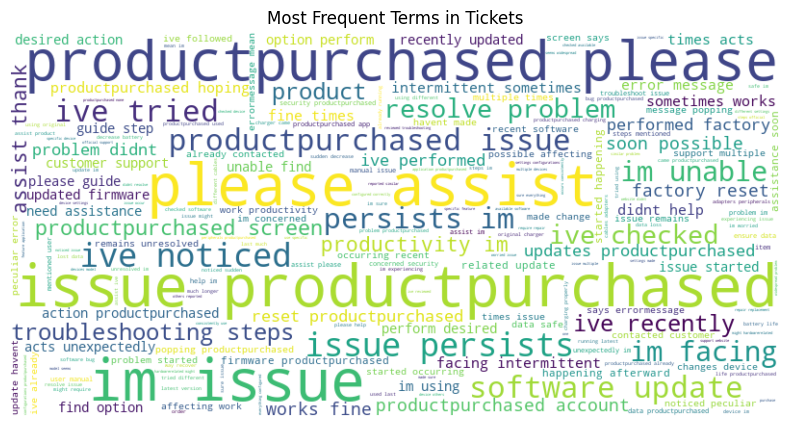

In [10]:
text_blob = ' '.join(df['cleaned_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_blob)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Frequent Terms in Tickets")
plt.show()


In [11]:
vectorizer = TfidfVectorizer(max_df=0.8, min_df=5)
X = vectorizer.fit_transform(df['cleaned_text'])

In [12]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(X)
df[['cleaned_text', 'cluster']].head()

,cleaned_text,cluster
0,im issue productpurchased please assist billin...,1
1,im issue productpurchased please assist need c...,2
2,im facing problem productpurchased productpurc...,2
3,im issue productpurchased please assist proble...,4
4,im issue productpurchased please assist note s...,2


In [13]:
def get_top_keywords(n_terms):
    order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
    terms = vectorizer.get_feature_names_out()
    for i in range(5):
        print(f"\nCluster {i} keywords:")
        print(", ".join([terms[ind] for ind in order_centroids[i, :n_terms]]))

get_top_keywords(10)



Cluster 0 keywords:
connecting, others, similar, reported, problems, sure, specific, device, wifi, detect

Cluster 1 keywords:
steps, please, problem, ive, didnt, troubleshooting, resolve, assist, help, reset

Cluster 2 keywords:
please, assist, data, ive, tried, persists, using, might, product, facing

Cluster 3 keywords:
update, started, please, made, assist, device, ive, work, affecting, soon

Cluster 4 keywords:
already, remains, unresolved, contacted, customer, multiple, support, times, ive, latest


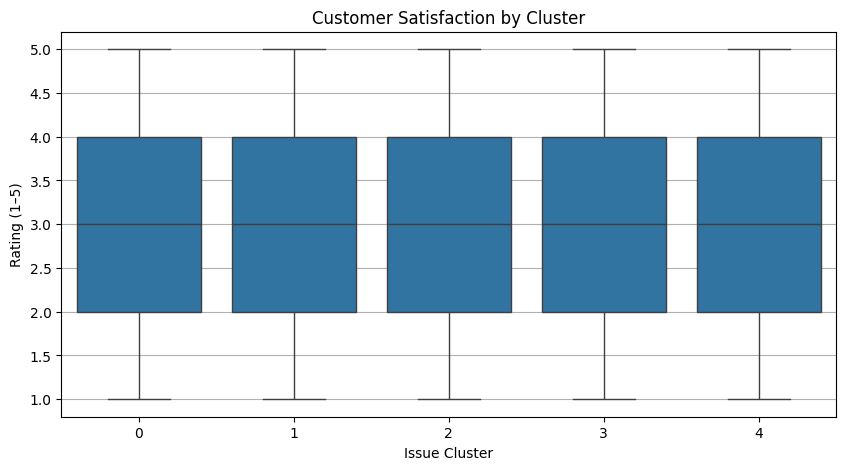

In [14]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='cluster', y='Customer Satisfaction Rating', data=df)
plt.title("Customer Satisfaction by Cluster")
plt.ylabel("Rating (1–5)")
plt.xlabel("Issue Cluster")
plt.grid(True, axis='y')
plt.show()


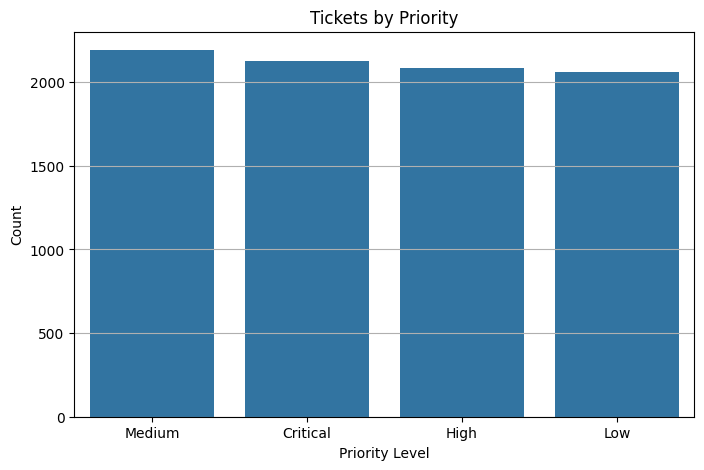

In [15]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Ticket Priority', data=df, order=df['Ticket Priority'].value_counts().index)
plt.title("Tickets by Priority")
plt.xlabel("Priority Level")
plt.ylabel("Count")
plt.grid(True, axis='y')
plt.show()


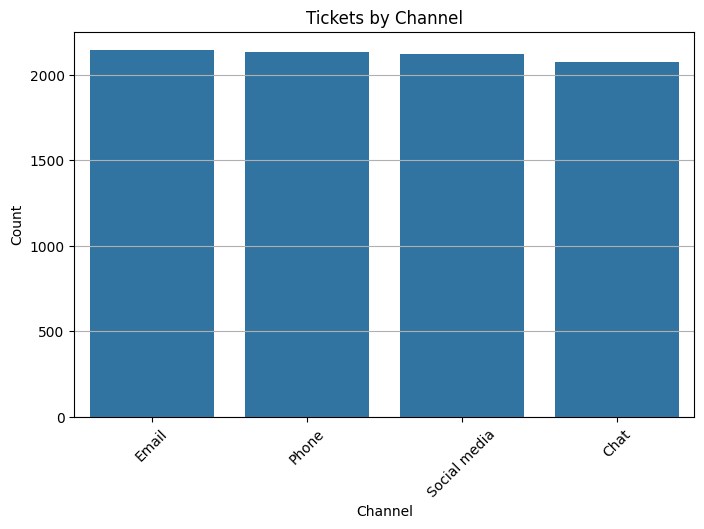

In [16]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Ticket Channel', data=df, order=df['Ticket Channel'].value_counts().index)
plt.title("Tickets by Channel")
plt.xlabel("Channel")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.show()


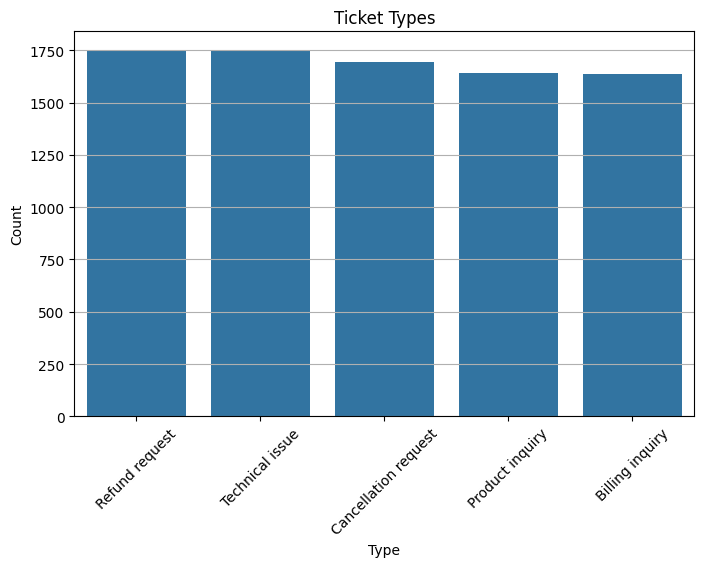

In [17]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Ticket Type', data=df, order=df['Ticket Type'].value_counts().index)
plt.title("Ticket Types")
plt.xlabel("Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.show()


In [18]:
summary = df.groupby('cluster').agg({
    'Ticket ID': 'count',
    'Customer Satisfaction Rating': 'mean',
    'Ticket Priority': lambda x: x.value_counts().index[0],
    'Ticket Channel': lambda x: x.value_counts().index[0]
}).rename(columns={
    'Ticket ID': 'Ticket Count',
    'Customer Satisfaction Rating': 'Avg Satisfaction',
    'Ticket Priority': 'Most Common Priority',
    'Ticket Channel': 'Most Common Channel'
}).round(2)

summary


,Ticket Count,Avg Satisfaction,Most Common Priority,Most Common Channel
cluster,,,,
0,423,3.20,Low,Social media
1,2114,2.92,Medium,Email
2,3128,2.99,Critical,Phone
3,2107,3.06,Medium,Social media
4,697,2.89,Medium,Email


In [19]:
import pandas as pd

df_cleaned = df.dropna(subset=['Time to Resolution', 'First Response Time'])

# Clean the 'Ticket Description' text
import re
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

df_cleaned['cleaned_text'] = df_cleaned['Ticket Description'].apply(clean_text)

# Save the cleaned version to a new file
df_cleaned.to_csv('cleaned_customer_support_data.csv', index=False)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lilia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\lilia\AppData\Local\Temp\ipykernel_14816\624127729.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['cleaned_text'] = df_cleaned['Ticket Description'].apply(clean_text)
